NLTK - Natural Language Toolkit - suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written.

- TextBlob
- Scipy


In [ ]:
!pip install TextBlob 

In [ ]:
import textblob as tb

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/amazon_alexa.tsv","\t")


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.shape, df.columns.values

((3150, 5),
 array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
       dtype=object))

In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


That means more than 50% people gave 5 rating

In [ ]:
#checking the smmary for date , variation and review
df.describe(include= 'object') 

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


# top variation happen for black dot

In [ ]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

finding length , polarity and subjectivity. process of determining the attitude or emotion of the writer is called "sentimental analysis". for that we will use textblob library.


In [ ]:
df['length'] = df['verified_reviews'].apply(len)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


# text Polarity 
sentiment plarity can be determine as positive , negative and neutral ranging from [-1,1].

It is the expression that determine the sentimental aspect of an opinion. in textual data, the result of sentiment analysis can be determine for each entity in the sentence document or sentence .

In [ ]:
def get_polarity(text):
  blob = tb.TextBlob(str(text.encode('utf-8')))
  pol = blob.sentiment.polarity
  return pol

In [ ]:
df['polarity'] = df['verified_reviews'].apply(get_polarity)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.6000,0.625
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.8000,0.875
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.5125,-0.100
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.4500,0.350
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000


in NLP, sbjectivity refers to the expression of opinion , evaluations, feelings, and speculation and thus incorporates emotion. 

In [ ]:
def get_subjectivity(text):
  blob = tb.TextBlob(str(text.encode('utf-8')))
  subj  = blob.sentiment.subjectivity
  return subj

In [ ]:
df['subjectivity'] = df['verified_reviews'].apply(get_subjectivity)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.6000,0.625
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.8000,0.875
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.5125,-0.100
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.4500,0.350
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000


In [ ]:
df[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,3150.000000,3150.000000,3150.000000
mean,132.049524,0.349792,0.528922
std,182.099952,0.303362,0.256324
min,1.000000,-1.000000,0.000000
25%,30.000000,0.123852,0.419196
50%,74.000000,0.350000,0.585000
75%,165.000000,0.533333,0.695486
max,2851.000000,1.000000,1.000000


# finding the words and punctuation

In [ ]:
'hello world i  am rankush '.split()

['hello', 'world', 'i', 'am', 'rankush']

In [ ]:
#word count
df['word_count'] = df['verified_reviews'].apply(lambda x: len(x.split()))

In [ ]:
# word density
df['word_density'] = df['length']/(df['word_count']+1)

In [ ]:
import string
punctuation = string.punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
import string
punctuation = string.punctuation
df['punctuation_count'] = df['verified_reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity,word_count,word_density,punctuation_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.6000,0.625,3,3.250000,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.8000,0.875,2,3.000000,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.5125,-0.100,38,5.000000,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.4500,0.350,34,4.914286,4
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000,1,2.500000,0


In [ ]:
df[['word_count','word_density','punctuation_count']].describe()

,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000
mean,25.293016,4.605345,3.887937
std,34.584971,1.134737,5.762348
min,0.000000,0.500000,0.000000
25%,6.000000,4.269231,1.000000
50%,14.000000,4.805665,2.000000
75%,32.000000,5.207974,5.000000
max,526.000000,32.500000,121.000000


# counting noun and verb in the text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
wiki = tb.TextBlob('love my echo')
wiki.tags

[('love', 'VB'), ('my', 'PRP$'), ('echo', 'NN')]

In [ ]:
# part of speech 

pos_dic = {
    'noun':['NN','NNS','NNP','NNPS'],
    'pron':['PRP','PRP$','WP','WP$'],
    'verb':['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj':['JJ','JJR','JJS'],
    'adv':['RB','RBR','RBS','WRB']
}

# FUNCTION TO CHECK AND GET PART OF SPEECH TAG COUNT OF A WORDS IN A GIVEN SENTENCE
def pox_check(x,flag):
  count  =0 
  try:
    wiki = tb.TextBlob(x)
    for tup in wiki.tags:
      ppo = list(tup)[1]
      if ppo in pos_dic[flag]:
        count+=1
  except:
    pass
  return count

In [ ]:
#noun
df['noun_count'] = df['verified_reviews'].apply(lambda x: pox_check(x,'noun'))

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity,word_count,word_density,punctuation_count,noun_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.6000,0.625,3,3.250000,1,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.8000,0.875,2,3.000000,1,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.5125,-0.100,38,5.000000,3,5
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.4500,0.350,34,4.914286,4,11
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000,1,2.500000,0,0


In [ ]:
# verb
df['verb_count'] = df['verified_reviews'].apply(lambda x: pox_check(x,'verb'))
# pronoun
df['pron_count'] = df['verified_reviews'].apply(lambda x: pox_check(x,'pron'))
# adjective
df['adj_count'] = df['verified_reviews'].apply(lambda x: pox_check(x,'adj'))
# adverb
df['adv_count'] = df['verified_reviews'].apply(lambda x: pox_check(x,'adv'))

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.6000,0.625,3,3.250000,1,1,1,1,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.8000,0.875,2,3.000000,1,0,1,1,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.5125,-0.100,38,5.000000,3,5,8,5,3,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.4500,0.350,34,4.914286,4,11,6,2,1,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000,1,2.500000,0,0,0,0,1,0


In [ ]:
df[['noun_count','verb_count']].describe()

,noun_count,verb_count
count,3150.000000,3150.000000
mean,5.927302,5.144444
std,8.206844,7.211263
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,7.000000,7.000000
max,137.000000,101.000000


# Cleaing the data
  

1.   Removing the punctuations and the numbers.
2.   perform tokenization
3.   Remove special and accented charcters
4.   Remove stopwords
5.   Perform stemming and lemmatization



In [ ]:
# removing punctuations and numbers 
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.6000,0.625,3,3.250000,1,1,1,1,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.8000,0.875,2,3.000000,1,0,1,1,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.5125,-0.100,38,5.000000,3,5,8,5,3,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.4500,0.350,34,4.914286,4,11,6,2,1,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000,1,2.500000,0,0,0,0,1,0


In [ ]:
# function for removing the punctuations
def remove_punctuations(messy_words):
  clean_list = [ch for ch in messy_words if ch not in string.punctuation]
  clean_str = "".join(clean_list)
  return clean_str



In [ ]:
'hello world !@# '
"hello world "

In [ ]:
df['verified_reviews'] = df['verified_reviews'].apply(remove_punctuations)

In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,subjectivity,polarity,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13,0.6000,0.625,3,3.250000,1,1,1,1,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9,0.8000,0.875,2,3.000000,1,0,1,1,0,0
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer ...,1,195,0.5125,-0.100,38,5.000000,3,5,8,5,3,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My 4 y...,1,172,0.4500,0.350,34,4.914286,4,11,6,2,1,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0000,0.000,1,2.500000,0,0,0,0,1,0


In [ ]:
df['verified_reviews'][3]

'I have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well'

In [ ]:
import re # regular Expression

In [ ]:
# function for removing the numbers
def remove_numbers(text):
  new_list = []
  for i in text:
    if not re.search('\d',i):
      new_list.append(i)
  return "".join(new_list)
df['verified_reviews'] = df['verified_reviews'].apply(remove_numbers)

In [ ]:
df['verified_reviews'][3]

'I have had a lot of fun with this thing My  yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well'


```
# Tokenization - is the way of seperating a piece of text into smaller unit called as tokens and tokens can be a ter, word or whole sentences. 
```



In [ ]:
import nltk
from nltk.tokenize import sent_tokenize , word_tokenize

In [ ]:
# sentence tokenize
sentence = "NLP is a subfield of linguistic, computer science, and artificial intelligence. it concerned with the interactions between computers and human language. this in particular how to program computers to process and analyze large amounts of natural language data."
sent_tokens = sent_tokenize(sentence)
print(sent_tokens)

['NLP is a subfield of linguistic, computer science, and artificial intelligence.', 'it concerned with the interactions between computers and human language.', 'this in particular how to program computers to process and analyze large amounts of natural language data.']


In [ ]:
word_tokens = word_tokenize(sentence)
print(word_tokens)

['NLP', 'is', 'a', 'subfield', 'of', 'linguistic', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', '.', 'it', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', '.', 'this', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']


In [ ]:
def make_sent_tokens(text):
  return sent_tokenize(text)
df['sent_tokens'] = df['verified_reviews'].apply(make_sent_tokens)

In [ ]:
def make_word_tokens(text):
  return word_tokenize(text)
df['word_tokens'] = df['verified_reviews'].apply(make_word_tokens)

In [ ]:
df[['sent_tokens','word_tokens']].head()

,sent_tokens,word_tokens
0,[Love my Echo],"[Love, my, Echo]"
1,[Loved it],"[Loved, it]"
2,[Sometimes while playing a game you can answer...,"[Sometimes, while, playing, a, game, you, can,..."
3,[I have had a lot of fun with this thing My y...,"[I, have, had, a, lot, of, fun, with, this, th..."
4,[Music],[Music]


In [ ]:
import unicodedata

In [ ]:
# removing special and accented charcters
# since ascii doesn't include any accented charcter we can remove with th ehelp of encoding thetext into ascii
def remove_accent(text):
  new_text = unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
  return new_text

In [ ]:
df['verfied_reviews'] = df.apply(lambda x: remove_accent(x['verified_reviews']),axis=1)

________________________________________________________________________


In [ ]:
def remove_special_char(text):
  pattern  = r'[^a-zA-Z0-9]'
  return re.sub(pattern, ' ', text)


In [ ]:
df['verified_reviews'] = df.apply(lambda x: remove_special_char(x['verified_reviews']),axis=1)

In [ ]:
df['verfied_reviews'].head(10)

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the th one Ive purchased Im wo...
8                                          looks great
9    Love it Ive listened to songs I havent heard s...
Name: verfied_reviews, dtype: object

In [ ]:
remove_special_char('hii @rk i am newbie @point1 please help me @2.0')

'hii  rk i am newbie  point1 please help me  2 0'

In [ ]:
# removing the stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopword(text):
  # first we should do word_tokenization i have done that so i'm using it 
  new_words = [word.lower() for word in text if not word.lower() in stopword]
  return " ".join(new_words)

In [ ]:
remove_stopword(['NLP', 'is', 'a', 'subfield', 'of', 'linguistic', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', '.', 'it', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', '.', 'this', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
)

'nlp subfield linguistic , computer science , artificial intelligence . concerned interactions computers human language . particular program computers process analyze large amounts natural language data .'

In [ ]:
df['remove_stopword'] = df['word_tokens'].apply(remove_stopword)

In [ ]:
df['remove_stopword'].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing yr old learns dinosaurs control ...
4                                                music
Name: remove_stopword, dtype: object

In [ ]:
# removing the stopword using gensim library
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
df['new_rem_stopwrods'] = df['verified_reviews'].apply(remove_stopwords)

In [ ]:
df['new_rem_stopwrods'].head()

0                                            Love Echo
1                                                Loved
2    Sometimes playing game answer question correct...
3    I lot fun thing My yr old learns dinosaurs con...
4                                                Music
Name: new_rem_stopwrods, dtype: object

# stemming and lemmatizing the text - reducing the word to root word

'''
1. Stemming :  ask,asking,asked will 
reduced to root word ask. Doesn't care for the meaning of the words.


2.  lemmatizating : good and better will reduce to good , but if we do stemming the better word reduce to bet. do care the meaning as per according to the disctionary 
'''

In [ ]:
# for lemmatizing
import spacy
nlp_lemm = spacy.load('en_core_web_sm',parse=True, tag=True, entity=True)



In [ ]:
def get_stem(text):
  stemmer = nltk.porter.PorterStemmer()
  text = ' '.join([stemmer.stem(word) for word in text.split()])
  return text


In [ ]:
get_stem('we are eating the banana and swimming in the beach')

'we are eat the banana and swim in the beach'

In [ ]:
def get_lemmatize(text):
  text = nlp_lemm(text)
  text = " ".join([word.lemma_ if word.lemma_ != '-pron-' else word.text for word in text])
  return text

In [ ]:
get_lemmatize('I am going to play with the players of football who is playing in basketball club')

'-PRON- be go to play with the player of football who be play in basketball club'

# Feature Extraction for NLP
--- Feature extraction means to extract and produce feature representation that are appropriate for the nlp task.

    major feature extraction technique for nlp are :
    1. Bags of words representation
    2. Tf-Idf
    3. N-gram analysis



 **1.Bags of words representation** 
 
        1. It checks the frequency of the distinct words occuring in the text
        2. All the distinct words make the columns of the matrix and the vales are represented as 0 or 1 based on the absence or presence of the word in the text.
  
**2.TF-Idf representation** 
        
        1. It is short frequency - inverse document frequency .
        2. It is designed to reflect how importand a word is to a document in  a collection of corpus.
        3. the TF-IDF value increases proportionally to the number of times word appears in a document .
        4. It is calculated by 
            a. How many times a word appeard in a document.
            b. Inverse document frequency of the qord across a set of documents.
        5. Inverse Document frequency is basically how common a  word is in entire document set and Calculated by log(total no. of documents/ no. of documents containing word)
        6. # higher the score the more relevent word. ie. Information Retrieval , Keyword extraction






In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count,sent_tokens,word_tokens,verfied_reviews,remove_stopword,new_rem_stopwrods
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13,0.625,0.6000,3,3.250000,1,1,1,1,0,0,[Love my Echo],"[Love, my, Echo]",Love my Echo,love echo,Love Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9,0.875,0.8000,2,3.000000,1,0,1,1,0,0,[Loved it],"[Loved, it]",Loved it,loved,Loved
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer ...,1,195,-0.100,0.5125,38,5.000000,3,5,8,5,3,3,[Sometimes while playing a game you can answer...,"[Sometimes, while, playing, a, game, you, can,...",Sometimes while playing a game you can answer ...,sometimes playing game answer question correct...,Sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My yr...,1,172,0.350,0.4500,34,4.914286,4,11,6,2,1,5,[I have had a lot of fun with this thing My y...,"[I, have, had, a, lot, of, fun, with, this, th...",I have had a lot of fun with this thing My yr...,lot fun thing yr old learns dinosaurs control ...,I lot fun thing My yr old learns dinosaurs con...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,1,2.500000,0,0,0,0,1,0,[Music],[Music],Music,music,Music


In [ ]:
# cleaning the data using stemming 
corpus  = []
for i in range(0,len(df)):
  review = re.sub('[^a-zA-z]', ' ', df['verified_reviews'][i])
  review = review.lower()
  review = review.split()
  ps = nltk.porter.PorterStemmer()
  review = [ps.stem(word) for word in review if not word in set (stopword)]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep herit fun ask random question hear respons seem smartbon polit yet',
 'think th one ive purchas im work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like didsh enjoy 

In [ ]:
# creating bag of words 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
x1 = cv.fit_transform(corpus).toarray()
y1 =  df.iloc[:,4].values

In [ ]:
print(x1.shape, y1.shape)

(3150, 2500) (3150,)


In [ ]:
# creating the TF-Idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features = 2500)
x2 = tf.fit_transform(corpus).toarray()
y2 = df.iloc[:,4].values


In [ ]:
print(x2.shape, y2.shape)

(3150, 2500) (3150,)


#  N-gram analysis
  -- sequence of n words
     i.e. I am rankush.
     1 - gram => "I",  "am" , "rankush"
     2 - gram => "I am" , "am rankush" , "rankush"
     3 - gram => "I am rankush"

     importance : commonly we use n-gram analysis in text mining such as auto completion of sentence and auto spell checking.


In [ ]:
# n-gram implementation
cv = CountVectorizer(max_features = 2500, ngram_range=(2,2)) # two gram , if we want 3-gram (3,3)
x3 = cv.fit_transform(corpus).toarray()
y3 =  df.iloc[:,4].values

In [ ]:
tf = TfidfVectorizer(max_features = 2500, ngram_range=(2,2)) # to use tri-gram pass (3,3)
x4 = tf.fit_transform(corpus).toarray()
y4 = df.iloc[:,4].values

# Data visualization in nlp


In [ ]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count,sent_tokens,word_tokens,verfied_reviews,remove_stopword,new_rem_stopwrods
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13,0.625,0.6000,3,3.250000,1,1,1,1,0,0,[Love my Echo],"[Love, my, Echo]",Love my Echo,love echo,Love Echo
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9,0.875,0.8000,2,3.000000,1,0,1,1,0,0,[Loved it],"[Loved, it]",Loved it,loved,Loved
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer ...,1,195,-0.100,0.5125,38,5.000000,3,5,8,5,3,3,[Sometimes while playing a game you can answer...,"[Sometimes, while, playing, a, game, you, can,...",Sometimes while playing a game you can answer ...,sometimes playing game answer question correct...,Sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My yr...,1,172,0.350,0.4500,34,4.914286,4,11,6,2,1,5,[I have had a lot of fun with this thing My y...,"[I, have, had, a, lot, of, fun, with, this, th...",I have had a lot of fun with this thing My yr...,lot fun thing yr old learns dinosaurs control ...,I lot fun thing My yr old learns dinosaurs con...
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,1,2.500000,0,0,0,0,1,0,[Music],[Music],Music,music,Music


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


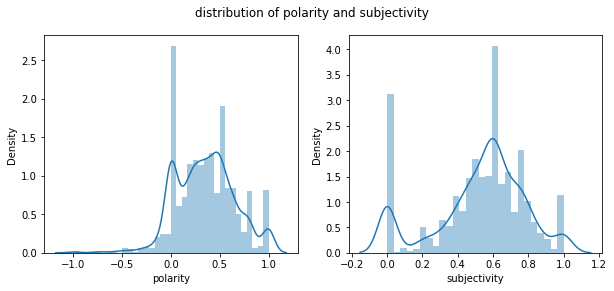

In [ ]:
# visualizing the polarity and subjectivity 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,2,1)
sns.distplot(df['polarity'])
plt.subplot(1,2,2)
sns.distplot(df['subjectivity'])
plt.suptitle('distribution of polarity and subjectivity ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


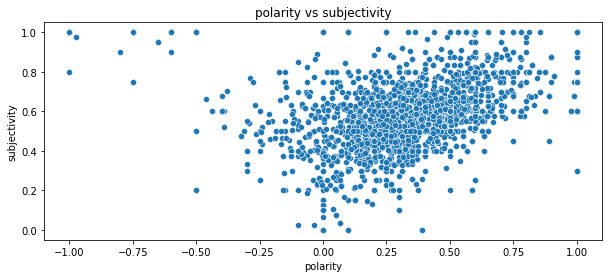

In [ ]:
# lets check the relationship between the polarity and subjectivity 
sns.scatterplot(df['polarity'], df['subjectivity'])
plt.title('polarity vs subjectivity')
plt.show()

In [ ]:
# process whole document
text = ("""These are short, famous texts in English from classic sources like the Bible or Shakespeare. Some texts have word definitions and explanations to help you. Some of these texts are written in an old style of English. Try to understand them, because the English that we speak today is based on what our great, great, great, great grandparents spoke before! Of course, not all these texts were originally written in English
""")

doc = nlp_lemm(text)
# token and tag
#for token in doc:
#  print(token,token.pos_)
print("verbs:",[token.text for token in doc if token.pos_ == "VERB"])

verbs: ['help', 'written', 'Try', 'understand', 'speak', 'based', 'spoke', 'written']


In [ ]:
# name and entity location
doc = nlp_lemm("rankush is looking for data science role in California with ctc of $1.5 cr/annum")
for ent in doc.ents:
  print(ent.text, ent.start_char, ent.end_char, ent.label_)

rankush 0 7 PERSON
California 44 54 GPE
1.5 68 71 MONEY


In [ ]:
# using displacy
from spacy import displacy
doc = nlp_lemm(df['verified_reviews'][0])
displacy.serve(doc,style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [ ]:
import numpy as np

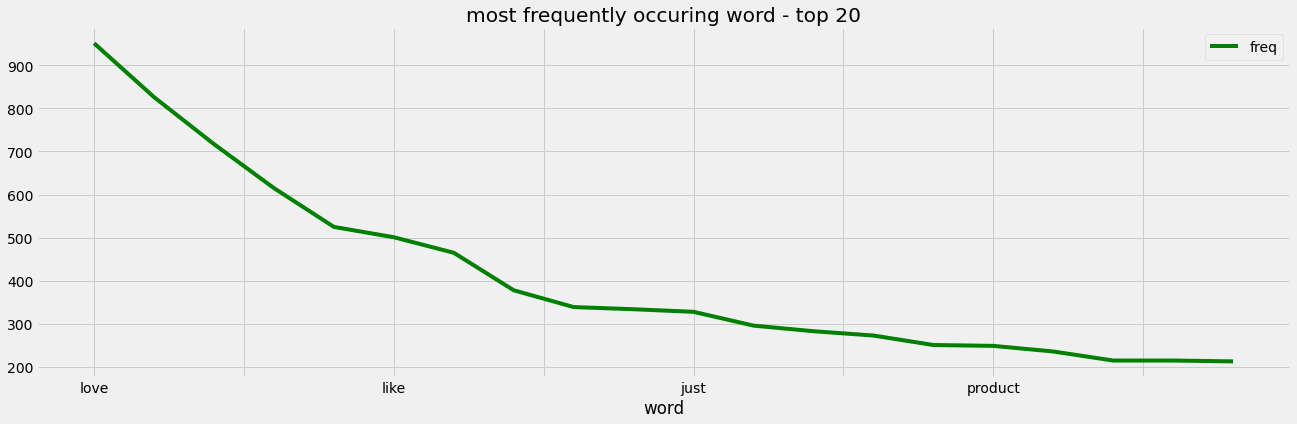

In [ ]:
# most frequent word in doc
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)
sum_word = words.sum(axis=0)

word_freq = [(word, sum_word[0,idx]) for word,idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq,key = lambda x : x[1], reverse = True)
frequency = pd.DataFrame(word_freq,columns=['word','freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0,1,20))
frequency.head(20).plot(x='word', y='freq', figsize=(20,6), color = color)
plt.title("most frequently occuring word - top 20")
plt.show()

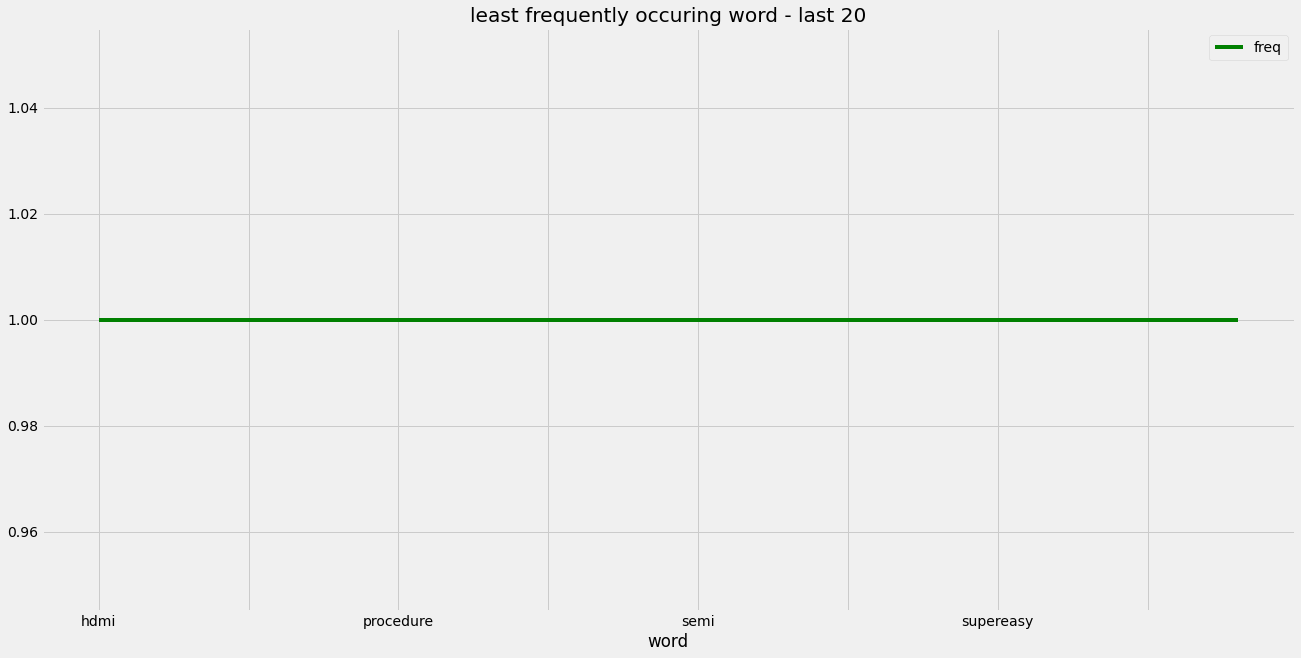

In [ ]:
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0,1,20))
frequency.tail(20).plot(x='word', y='freq', figsize=(20,10), color = color)
plt.title("least frequently occuring word - last 20")
plt.show()

In [ ]:
# visualizing n-gram
import collections
from nltk.util import ngrams


In [ ]:
text = str(df['verified_reviews'])
tokenize = text.split()
# getting list of bi-grams
bigram = ngrams(tokenize,2)
# getting the frequency of each bigram in our corpus
bigram_freq = collections.Counter(bigram)
# ten most popular ngrams 
bigram_freq.most_common(10)

[(('I', 'have'), 2),
 (('0', 'Love'), 1),
 (('Love', 'my'), 1),
 (('my', 'Echo'), 1),
 (('Echo', '1'), 1),
 (('1', 'Loved'), 1),
 (('Loved', 'it'), 1),
 (('it', '2'), 1),
 (('2', 'Sometimes'), 1),
 (('Sometimes', 'while'), 1)]

In [ ]:
# tri-gram
text = str(df['verified_reviews'])
tokenize = text.split()
# getting list of bi-grams
trigram = ngrams(tokenize,3)
# getting the frequency of each bigram in our corpus
trigram_freq = collections.Counter(trigram)
# ten most popular ngrams 
trigram_freq.most_common(10)

[(('0', 'Love', 'my'), 1),
 (('Love', 'my', 'Echo'), 1),
 (('my', 'Echo', '1'), 1),
 (('Echo', '1', 'Loved'), 1),
 (('1', 'Loved', 'it'), 1),
 (('Loved', 'it', '2'), 1),
 (('it', '2', 'Sometimes'), 1),
 (('2', 'Sometimes', 'while'), 1),
 (('Sometimes', 'while', 'playing'), 1),
 (('while', 'playing', 'a'), 1)]

# introduction to word cloud 
  --  display the list of words and the importance or the frequency of each word is depicted by the word size and color.
Word clouds are widely used for analyzing data from social networking sites.



In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

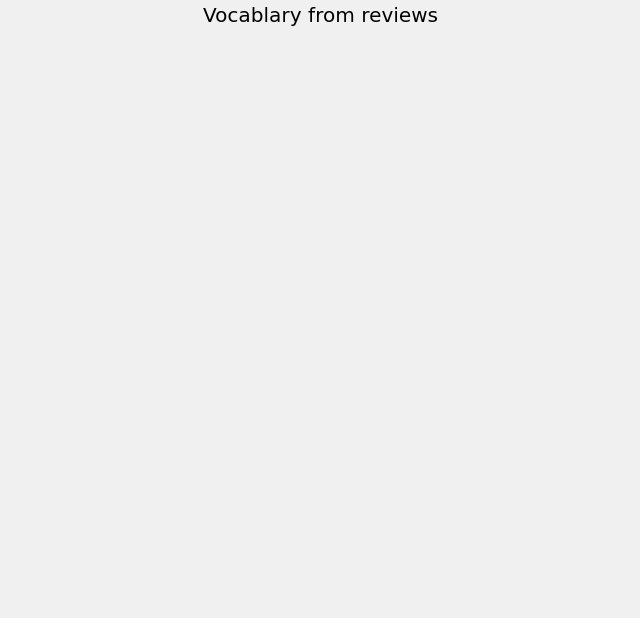

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)
sum_word = words.sum(axis=0)

word_freq = [(word, sum_word[0,idx]) for word,idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq,key = lambda x : x[1], reverse = True)
wordcloud = WordCloud(background_color='lightcyan',width = 2000, height = 2000).generate_from_frequencies(dict(word_freq))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title("Vocablary from reviews", fontsize = 20)
plt.show()

# Text Classification using ml 
    

```
process of analyzing the natural language text and then labelling the text with a predefined set of labels or tags.

# for example : Email classification spam or not spam, sentiment analysis , language detection
```
# models for text classification
1. Naive bayes family of algoriths
2. Support vector Machines (svm)
3. Deep learning


# naive bayes
 --  is based on conditional probability the probability of an event occuring based on the occurance of the previous event.
 # bayes theoram
 P(A/B) = P(A and B)/P(B) => P(A and B) = P(A/B) P(B)   .......(i)
 P(B/A) = P(B AND A)/P(A) => P(B AND A) = P(B/A) P(A)   ........(ii)
 from both equation we will get

 P(A/B) = [P(B/A) P(A)]/P(B)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x2,y2, test_size=0.3, random_state = 15)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('training accuracy:-',model.score(x_train,y_train))
print('testing accuracy:-',model.score(x_test,y_test))

training accuracy:- 0.6444444444444445
testing accuracy:- 0.5936507936507937


In [ ]:
# Implementing the Support vector machine
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
print('training accuracy:-',model2.score(x_train,y_train))
print('testing accuracy:-',model2.score(x_test,y_test))

training accuracy:- 0.981859410430839
testing accuracy:- 0.9301587301587302


In [ ]:
!pip install tweepy

# Project Setiment analysis engine
---  A processing technique used to determine whether the data is positive , negative, or neutral.



In [ ]:
# loading the dataset 
data = pd.read_csv("/content/drive/MyDrive/sentiment140.csv",encoding = "ISO-8859-1",nrows=1000)

In [ ]:
# removing the text start with @ and not alphaneumeric and start with https and adding the remaining charcters
def clean_data(text):
  return " ".join(re.sub("(@[a-zA-z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)"," ", text).split())

In [ ]:
data['cleaned_text'] = data['Reviews'].apply(clean_data)

In [ ]:
data.head()

,Reviews,cleaned_text
0,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...
2,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am i h...
4,@Kwesidei not the whole crew,not the whole crew


In [ ]:
# droping the numbers from the text
def drop_num(list_text):
  new_list = []
  for i in list_text:
    if not re.search('\d',i):
      new_list.append(i)
  return ''.join(new_list)


In [ ]:
data['cleaned_text'] = data['cleaned_text'].apply(drop_num)

In [ ]:
print(data.Reviews[100],'\n', data.cleaned_text[100])

@mangaaa I hope they will increase the capacity fast, yesterday was such a pain. Got the fail whale +15 times in 2 hours....  
 I hope they will increase the capacity fast yesterday was such a pain Got the fail whale  times in  hours


In [ ]:
# converting all the charcter in lower case
def lower_case(text):
  text_token = word_tokenize(text)
  text_lower = [x.lower() for x in text_token]
  return ' '.join(text_lower)

In [ ]:
data['cleaned_text'] = data['cleaned_text'].apply(lower_case)

In [ ]:
print(data.Reviews[50],'\n', data.cleaned_text[50])

@localtweeps Wow, tons of replies from you, may have to unfollow so I can see my friends' tweets, you're scrolling the feed a lot.  
 wow tons of replies from you may have to unfollow so i can see my friends tweets you re scrolling the feed a lot


In [ ]:
import nltk

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatizing the text
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
  text_token = word_tokenize(text)
  text_lemma = [lemmatizer.lemmatize(word) for word in text_token]
  return ' '.join(text_lemma)

In [ ]:
data['cleaned_text'] = data['cleaned_text'].apply(lemmatizing)

In [ ]:
print(data.Reviews[250],'\n', data.cleaned_text[250])

feeling lost, naked and confused (JK, sort of).....no iphone for me.  
 feeling lost naked and confused jk sort of no iphone for me


In [ ]:
data['cleaned_text'].values

In [ ]:
# removing the stopword
def remove_stopword(text):
  text_tokens = word_tokenize(text)
  tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
  token_text = ' '.join(tokens)
  return token_text

In [ ]:
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopword)

In [ ]:
# removing accent word
data['cleaned_text'] = data.apply(lambda x: remove_accent(x['cleaned_text']),axis=1)


In [ ]:
# removing the punctuations
data['cleaned_text'] = data['cleaned_text'].apply(remove_punctuations)

In [ ]:
print(data.Reviews[250],'\n', data.cleaned_text[250])

feeling lost, naked and confused (JK, sort of).....no iphone for me.  
 feeling lost naked confused jk sort iphone


In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
# lets calculate polarity of the review
# polarity is the Expression which Determine the sentimental aspect of an opinion
def get_polarity(text):
  textblob = TextBlob(str(text))
  pol = textblob.sentiment.polarity
  if(pol==0):
    return "Neutral"
  elif(pol>0 and pol<=0.3):
    return "weakly Positive"
  elif(pol>0.3 and pol<=0.6):
    return "positive"
  elif(pol>0.6 and pol<=1):
    return "strongly Positive"
  elif(pol>-0.3 and pol<=0):
    return "weekly Negative"
  elif(pol>-0.6 and pol<=-0.3):
    return "Negative"
  elif(pol>-1 and pol<=-0.6):
    return "Strongly negative"



In [ ]:
data['polarity'] = data['cleaned_text'].apply(get_polarity)

In [ ]:
data['polarity'].value_counts()

Neutral              374
weakly Positive      179
weekly Negative      147
Negative             127
positive              78
Strongly negative     52
strongly Positive     36
Name: polarity, dtype: int64

# Drug prescription using reviews
 -- Problem statement :- for the aquisition process the startup are required to tabulate all drugs that they have sold and accout for the drug effectiveness. provide a sophisticated and useful model and find out most useful drug for each condition.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df_drug = pd.read_csv("/content/drive/MyDrive/drug.csv")

In [ ]:
df_drug.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
print(df_drug.shape)

(161297, 7)


In [ ]:
# exploring the dataset
print("number of unique drug present in the dataset : ", df_drug['drugName'].nunique())
print("number of unique medical condition present in the dataset : ", df_drug['condition'].nunique())
print('the time period of the data colelction are : ', df_drug['date'].min(), df_drug['date'].max())

number of unique drug present in the dataset :  3436
number of unique medical condition present in the dataset :  884
the time period of the data colelction are :  01-Apr-08 31-Oct-17


In [ ]:
# summerizing the dataset
df_drug[['rating','usefulCount']].describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [ ]:
# useful and useless drug
print("analysing useless drug count\n____________________________________\n")
print('drug having 0 usefullness : ',df_drug[df_drug['usefulCount']==0].count()[0])
print('number of good drug with lesser useful count : ',df_drug[(df_drug['usefulCount'] ==0) & df_drug['rating']>=8].count()[0])
print('average rating of drug with zero usefullness : ',np.average(df_drug[df_drug['usefulCount']==0]['rating']))
#print('name, condition and rating of these drugs : \n',df_drug[df_drug['usefulCount']==0][['drugName','condition','rating']].reset_index(drop = True))

analysing useless drug count
____________________________________

drug having 0 usefullness :  6318
number of good drug with lesser useful count :  0
average rating of drug with zero usefullness :  5.799778410889522


In [ ]:
print('analysing thr useful drug count\n___________________________________________\n')
print('drug having greater usefulness : ',df_drug[df_drug['usefulCount']>1000].count()[0])
print('average rating of drug with zero usefullness : ',np.average(df_drug[df_drug['usefulCount']>1000]['rating']))
print('name, condition and rating of these drugs : \n',df_drug[df_drug['usefulCount']>1000][['drugName','condition','rating']].reset_index(drop = True))

analysing thr useful drug count
___________________________________________

drug having greater usefulness :  4
average rating of drug with zero usefullness :  10.0
name, condition and rating of these drugs : 
          drugName      condition  rating
0          Mirena  Birth Control      10
1      Sertraline     Depression      10
2  Levonorgestrel  Birth Control      10
3          Zoloft     Depression      10


In [ ]:
# lets summarize the categorical data
df_drug[['drugName','condition','review']].describe(include = 'object')

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [ ]:
# is there any missing value
df_drug.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
# since condition is very crucial thing in order to predict the drug so we are removing the values having null condition
df_drug = df_drug.dropna()
df_drug.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


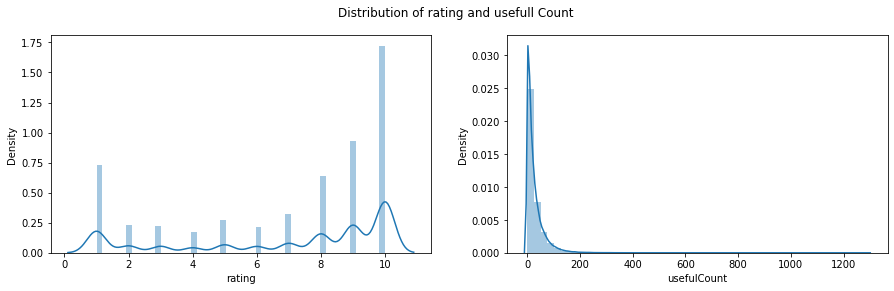

In [ ]:
# unveiling hidden pattern from the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,4)
plt.subplot(1,2,1)
sns.distplot(df_drug['rating'])
plt.subplot(1,2,2)
sns.distplot(df_drug['usefulCount'])
plt.suptitle('Distribution of rating and usefull Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


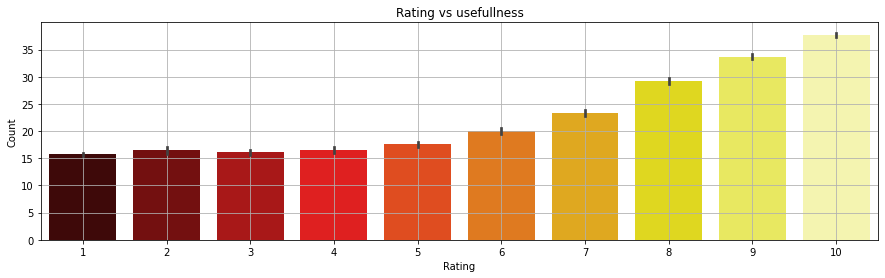

In [ ]:
# lets check the impact of rating on usefulness
sns.barplot(df_drug['rating'],df_drug['usefulCount'], palette='hot')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating vs usefullness')
plt.show()

In [ ]:
# checking if length of review has any impact on rating of the drugs
# for that we need to first find out the length of review column
df_drug['len'] = df_drug['review'].apply(len)


In [ ]:
df_drug.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719


In [ ]:
# lets check the impact
df_drug[['rating','len']].groupby(['rating']).agg(['min','mean','max'])

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

**got varying len and rating having no linear relation we can say that the length of review has no impact on the rating**

# Cleaning the data

In [ ]:
df_drug2 = df_drug[:1000] # ca be used with whole dataset
len(df_drug2)

1000

In [ ]:
import string

df_drug2['cleaned_text'] = df_drug2['review'].apply(clean_data)
df_drug2['cleaned_text'] = df_drug2['cleaned_text'].apply(drop_num)
df_drug2['cleaned_text'] = df_drug2['cleaned_text'].apply(lower_case)
df_drug2['cleaned_text'] = df_drug2['cleaned_text'].apply(lemmatizing)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
df_drug2['cleaned_text'] = df_drug2.apply(lambda x: remove_accent(x['cleaned_text']),axis=1)
df_drug2['cleaned_text'] = df_drug2['cleaned_text'].apply(remove_stopword)
df_drug2['cleaned_text'] = df_drug2['cleaned_text'].apply(remove_punctuations)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_drug2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_text
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79,ha side effect take combination bystolic mg fi...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741,son halfway fourth week intuniv became concern...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10,448,first time using form birth control glad went ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719,suboxone ha completely turned life around feel...


In [ ]:
# calculating the sentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
train_sentiments = []
for i in df_drug2['review']:
  train_sentiments.append(sid.polarity_scores(i).get('compound'))
train_sentiments = np.asarray(train_sentiments)
df_drug2['sentiment'] = pd.Series(data = train_sentiments)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_drug2.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,len,cleaned_text,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,79,ha side effect take combination bystolic mg fi...,-0.2960
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,741,son halfway fourth week intuniv became concern...,0.8603
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,755,used take another oral contraceptive pill cycl...,0.7645
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10,448,first time using form birth control glad went ...,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,719,suboxone ha completely turned life around feel...,0.9403


In [ ]:
df_drug2[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max']) # no proper pattern

sentiment                  
             min      mean     max
rating                            
1        -0.9904 -0.109672  0.9822
2        -0.9846 -0.187300  0.9486
3        -0.9902  0.009912  0.9548
4        -0.9675 -0.037506  0.9585
5        -0.9710 -0.111626  0.9470
6        -0.9729 -0.092732  0.9695
7        -0.9810 -0.035436  0.9638
8        -0.9776 -0.044995  0.9818
9        -0.9852 -0.069137  0.9746
10       -0.9911 -0.073455  0.9804

In [ ]:
df_ = df_drug2.drop(['date','uniqueID','sentiment','review','len'],axis = 1)

In [ ]:
df_.columns

Index(['drugName', 'condition', 'rating', 'usefulCount', 'cleaned_text'], dtype='object')

In [ ]:
# calculating the effectiveness and usefulness
min_rating = df_['rating'].min()
max_rating = df_['rating'].max()
def scale_rating(rating):
  rating -=min_rating
  rating = rating/(max_rating-1)
  rating *= 5
  rating = int(round(rating,0))
  if (int(rating)==0 or int(rating) == 1 or int(rating == 2)):
    return 0
  else:
    return 1
  

In [ ]:
df_['eff_score'] = df_['rating'].apply(scale_rating)

In [ ]:
df_.head()

,drugName,condition,rating,usefulCount,cleaned_text,eff_score
0,Valsartan,Left Ventricular Dysfunction,9,27,ha side effect take combination bystolic mg fi...,1
1,Guanfacine,ADHD,8,192,son halfway fourth week intuniv became concern...,1
2,Lybrel,Birth Control,5,17,used take another oral contraceptive pill cycl...,0
3,Ortho Evra,Birth Control,8,10,first time using form birth control glad went ...,1
4,Buprenorphine / naloxone,Opiate Dependence,9,37,suboxone ha completely turned life around feel...,1


In [ ]:
# calculating the usefulness
df_['usefulness'] = df_['rating']*df_['usefulCount']*df_['eff_score']

In [ ]:
# lets check the top most drug with their respective condition
df_[['drugName','condition','usefulness']][df_['usefulness'] > df_['usefulness'].mean()].sort_values(by = 'usefulness', ascending = False).head(10).reset_index(drop=True)

,drugName,condition,usefulness
0,Escitalopram,Depression,3008
1,Clonazepam,Anxiety,2610
2,Zoloft,Depression,1790
3,Fluoxetine,Anxiety and Stress,1730
4,Seroquel,Generalized Anxiety Disorde,1720
5,Effexor XR,Depression,1660
6,Guanfacine,ADHD,1536
7,Liothyronine,"Hypothyroidism, After Thyroid Removal",1521
8,Terbinafine,"Onychomycosis, Toenail",1510
9,Wellbutrin XL,Major Depressive Disorde,1431


In [ ]:
import ipywidgets
from ipywidgets import interact

In [ ]:
# lets caluculate the number of useless and useful drug for each consition
@interact
def check(condition = list(df_['condition'].value_counts().index)):
  return df_[df_['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Acne'…

In [ ]:
#finding most useful and useless drug for each condition
df_ = df_.drop_duplicates()

In [ ]:
@interact
def high_low_rate(condition = list(df_['condition'].value_counts().index)):
  print('top 5 drug')
  print(df_[df_['condition'] == condition][['drugName','usefulness']].sort_values(by='usefulness',ascending = False).head().reset_index(drop=True))

  print('last 5 drug')
  print(df_[df_['condition'] == condition][['drugName','usefulness']].sort_values(by='usefulness',ascending = True).head().reset_index(drop=True))


interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Acne'…